bokeh, altair

In [16]:
!pip install ydata-profiling


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


# pandas profiling and AutoEDA

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from ydata_profiling import ProfileReport

df = pd.read_csv('../db/video_games_sales.csv')
profile = ProfileReport(df, title="Profiling Report")

In [19]:
profile

## Probability Distributions

Why we need distributions?<br>
- To understand the population
- To make predictions
For these we need several measurements and with the help histograms we can summarize information.


**BUT**, histograms depend on bin size and massive amounts of data.

In [20]:
mu, sigma = 160, 10 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

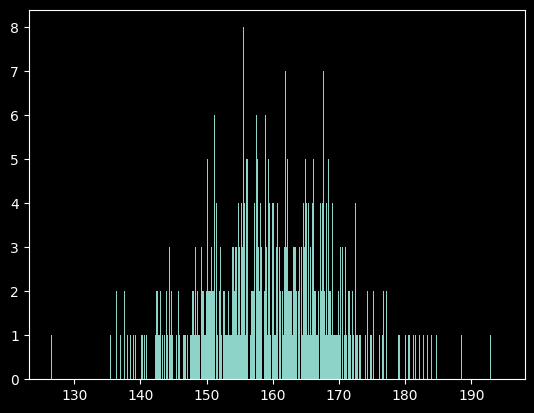

In [21]:
plt.hist(s, 1000);

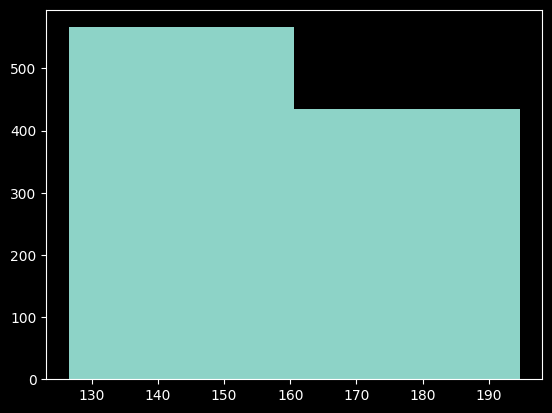

In [22]:
plt.hist(s, 2);

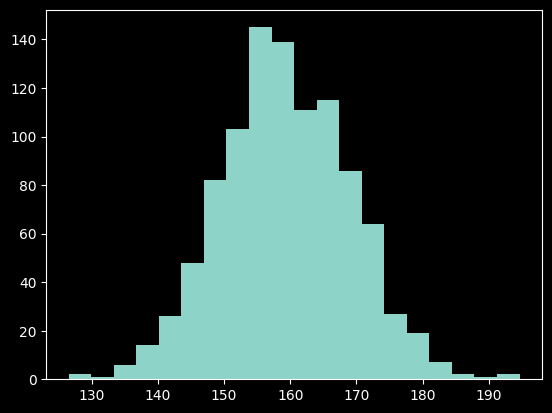

In [23]:
plt.hist(s, 20);

### Continuous

#### Normal (Gaussian)

The normal (or Gaussian) distribution has a bell-shaped density function and is used in the sciences to represent real-valued random variables that are assumed to be additively produced by many small effects. For example the normal distribution is used to model people's height, since height can be assumed to be the result of many small genetic and evironmental factors.

PDF, CDF

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$<br>
$\mu$ - mean<br>
$\sigma$ - variance

$\mathrm{Std}(X)= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2}$<br>
$\sigma(X)
= \frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$

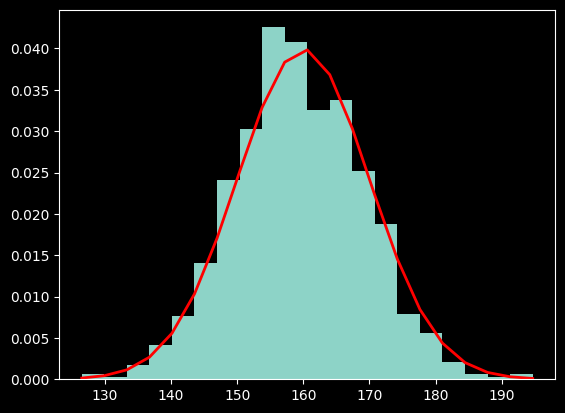

In [24]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

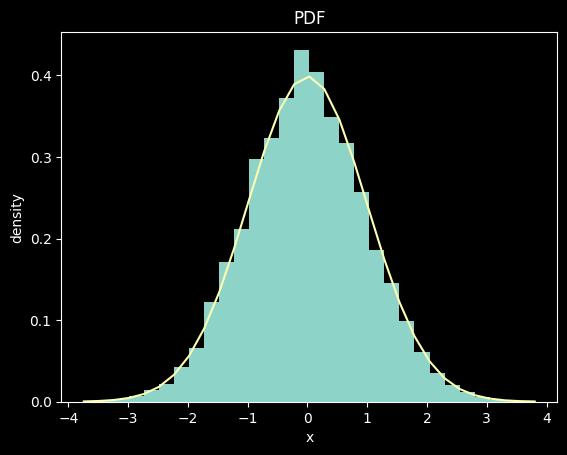

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# данные
np.random.seed(0)
mu = 0
sigma = 1
s = np.random.normal(mu, sigma, 10000)

# ---------- PDF ----------
plt.figure()
count, bins, _ = plt.hist(s, 30, density=True)
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, pdf)
plt.xlabel("x")
plt.ylabel("density")
plt.title("PDF")
plt.show()



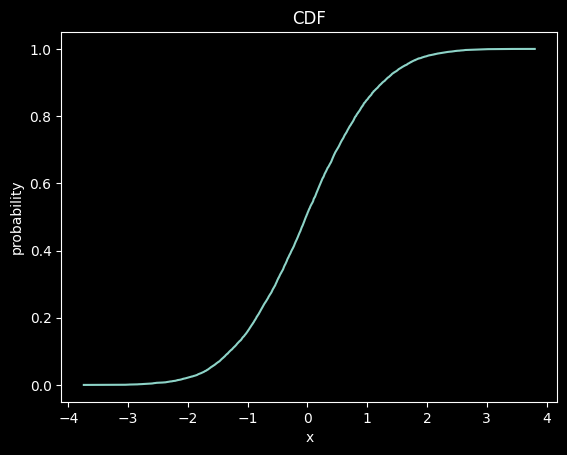

In [34]:
# ---------- CDF ----------
plt.figure()
sorted_s = np.sort(s)
cdf = np.arange(1, len(sorted_s) + 1) / len(sorted_s)
plt.plot(sorted_s, cdf)
plt.xlabel("x")
plt.ylabel("probability")
plt.title("CDF")
plt.show()

*y* axis shows likelihood and area under the curve shows *probability*.<br>
**Likelihood** - is a measure of how probable a particular set of observations is, given a set of model parameters. Unlike probability, likelihood is not confined to a range between 0 and 1. It's used in statistical inference, especially in methods like maximum likelihood estimation, where we try to find the parameter values that maximize the likelihood of observing the data we have.

In [25]:
1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (160 - mu)**2 / (2 * sigma**2))

np.float64(0.039894228040143274)

- Approximately 68% of the data falls within one standard deviation (σ) of the mean in both directions. This is often referred to as the 68-95-99.7 rule.
- About 95% of the data falls within two standard deviations (2σ) of the mean.
- Approximately 99.7% of the data falls within three standard deviations (3σ) of the mean.

#### Other Continous Distributions

##### Exponential

The exponential distribution is often used to model waiting times.

$f(x) =
\begin{cases}
\lambda e^{-\lambda x}, & x \ge 0 \\
0, & x < 0
\end{cases}$<br>
$\lambda $- rate

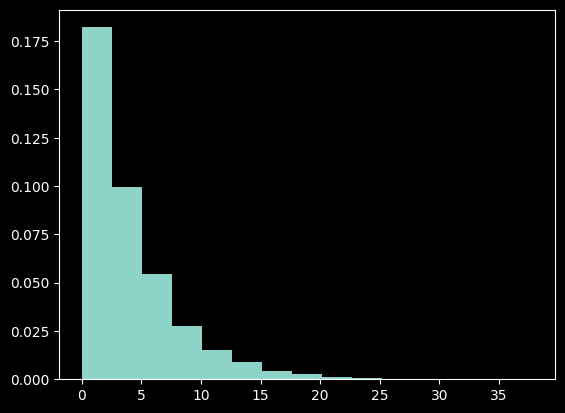

In [26]:
n = 10000
s = np.random.default_rng().exponential(scale=4, size=n)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.show()

A real world example: Assume a company has 10000 customer support agents and the average time between customer calls is 4 minutes.
What is the probability that a customer will call in the next 4 to 5 minutes?

In [27]:
x = ((s < 5).sum())/n 
y = ((s < 4).sum())/n
x-y

np.float64(0.07939999999999992)

##### Uniform

The uniform distribution is a continuous distribution such that all intervals of equal length on the distribution's support have equal probability. For example, if you want to generate random numbers which has the same probability of occurance, you use Uniform Distribution.

$f(x) =
\begin{cases}
\frac{1}{b - a}, & a \le x \le b \\
0, & \text{otherwise}
\end{cases}$

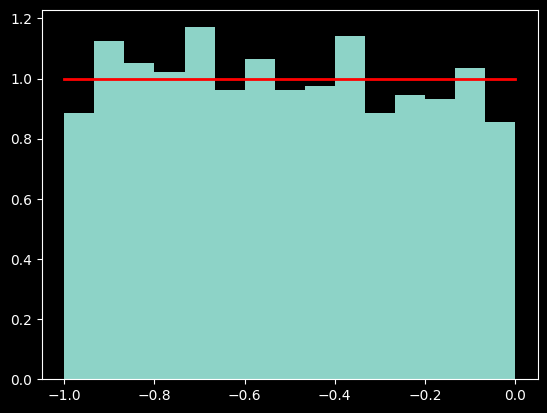

In [28]:
s = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

### Discrete Probability Distributions

PMF

#### Bernouilli

A Bernoulli random variable takes the value 1 with probability of p
 and the value 0 with probability of 1−p
. It is frequently used to represent binary experiments, such as a coin toss.

$P(X = x) = p^{\,x}(1 - p)^{\,1-x},
\quad x \in \{0,1\}$

#### Binomial

A binomial random variable is the sum of n
 independent Bernoulli random variables with parameter p
. It is frequently used to model the number of successes in a specified number of identical binary experiments, such as the number of heads in five coin tosses.

$P(X = k) =
\binom{n}{k} p^k (1 - p)^{\,n-k}$<br>
$\binom{n}{k}
=
\frac{n!}{k!(n-k)!}$<br>

**n** — number of trials<br>
**k** — number of successes(k=0,1,…,n)<br>
**p** — probability of success on each trial

In [29]:
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)


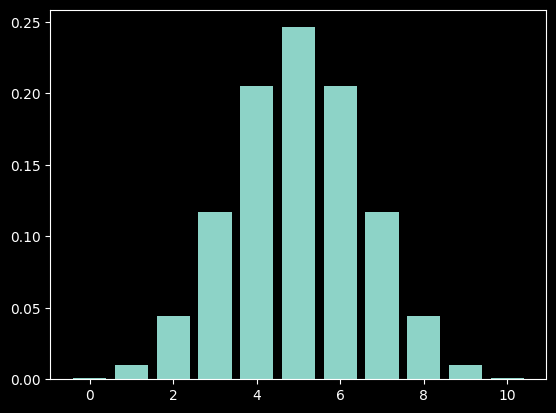

In [30]:
from scipy.stats import binom
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
plt.bar(x, pmf)

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [31]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000

np.float64(0.3918)

#### Poisson

A Poisson random variable counts the number of events occurring in a fixed interval of time or space, given that these events occur with an average rate λ
. This distribution has been used to model events such as meteor showers and goals in a soccer match.

$P(X = k) =
\frac{\lambda^{k} e^{-\lambda}}{k!},
\quad k = 0,1,2,\dots$<br>
$\lambda$ - rate